# Assignment 1 - Applied Machine Learning
---
## Arghadeep Ghosh

This notebook 'train.csv' contains the code for loading the Training, Validation and Test datasets, fitting Naive-Bayes, Logistic Regression and Random Forest models on the training data and evaluating the model on the Validation and Test datasets.

In [1]:
import pandas as pd
import csv

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

len(train), len(valid), len(test)

(3344, 1115, 1115)

## Preprocessing Functions
---
The data is converted from a sentence model to a Bag of words format with each word asigned a tf-idf weighting

In [3]:
def split_into_lemmas(message):
    message = message.lower()  # convert bytes into proper unicode
    words = TextBlob(message).words
    return [word.lemma for word in words]

train.message.apply(split_into_lemmas)

0       [xmas, iscoming, ur, awarded, either, £500, cd...
1                 [noice, text, me, when, you, 're, here]
2                    [85233, free, ringtone, reply, real]
3       [sorry, sir, i, will, call, you, tomorrow, sen...
4       [u, 447801259231, have, a, secret, admirer, wh...
                              ...                        
3339                   [i, am, in, a, marriage, function]
3340    [a, £400, xmas, reward, is, waiting, for, you,...
3341    [can, you, tell, shola, to, please, go, to, co...
3342                    [sir, waiting, for, your, letter]
3343    [message, from, i, am, at, truro, hospital, on...
Name: message, Length: 3344, dtype: object

In [4]:
word_vec = CountVectorizer()
word_vec.fit(train['message'])
train_bow = word_vec.transform(train['message'])
valid_bow = word_vec.transform(valid['message'])
test_bow = word_vec.transform(test['message'])

bow = word_vec.transform([train['message'][5]])

print(word_vec.get_feature_names_out()[2096])

dwn


In [5]:
tfidf_transformer = TfidfTransformer().fit(train_bow)
train_tfidf = tfidf_transformer.transform(train_bow)
valid_tfidf = tfidf_transformer.transform(valid_bow)
test_tfidf = tfidf_transformer.transform(test_bow)


tfidf = tfidf_transformer.transform(bow)
print(tfidf)

  (0, 4708)	0.6343458530051701
  (0, 4121)	0.4025707618465584
  (0, 3248)	0.6599561504232114


In [6]:
def evaluate_model(model, X, Y):
    Y_pred = model.predict(X)

    print('Accuracy:', accuracy_score(Y, Y_pred)*100, '%')
    print('Precision:', precision_score(Y, Y_pred, pos_label = 'spam')*100, '%')
    print('Recall:', recall_score(Y, Y_pred, pos_label = 'spam')*100, '%')
    print('F1 Score:', f1_score(Y, Y_pred, pos_label = 'spam')*100, '%')

    cm = confusion_matrix(Y, Y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

## Naive-Bayes Model
---
We train a Multinomial Naive-Bayes model on the training data and evaluate it on the validation and testing data. We've obtained the Accuracy, precision, recall, F1 score and the confusion matrix in each case.

In [7]:
%time spam_detectorNB = MultinomialNB().fit(train_tfidf, train['label'])

CPU times: total: 0 ns
Wall time: 6.02 ms


### Training Data

Accuracy: 96.83014354066985 %
Precision: 100.0 %
Recall: 76.70329670329672 %
F1 Score: 86.81592039800996 %


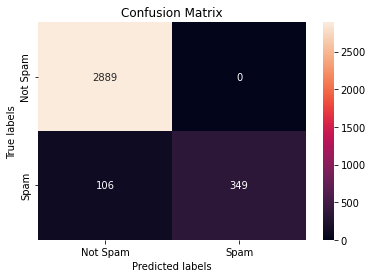

In [8]:
evaluate_model(spam_detectorNB, train_tfidf, train['label'])

### Validation Data

Accuracy: 94.97757847533632 %
Precision: 100.0 %
Recall: 63.1578947368421 %
F1 Score: 77.41935483870968 %


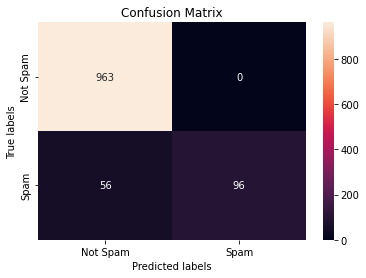

In [9]:
evaluate_model(spam_detectorNB, valid_tfidf, valid['label'])

### Test Data

Accuracy: 96.05381165919282 %
Precision: 100.0 %
Recall: 68.57142857142857 %
F1 Score: 81.35593220338984 %


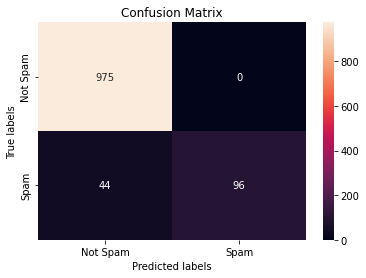

In [10]:
evaluate_model(spam_detectorNB, test_tfidf, test['label'])

## Logistic Regression Model
---
We train a Logistic Regression model on the training data and evaluate it on the validation and testing data. We've obtained the Accuracy, precision, recall, F1 score and the confusion matrix in each case.

In [11]:
%time spam_detectorLR = LogisticRegression().fit(train_tfidf, train['label'])

CPU times: total: 46.9 ms
Wall time: 47.9 ms


### Training Data

Accuracy: 97.03947368421053 %
Precision: 99.44444444444444 %
Recall: 78.68131868131869 %
F1 Score: 87.85276073619632 %


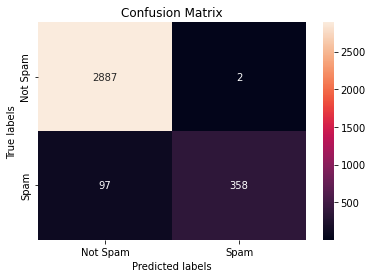

In [12]:
evaluate_model(spam_detectorLR, train_tfidf, train['label'])

### Validation Data

Accuracy: 95.69506726457399 %
Precision: 100.0 %
Recall: 68.42105263157895 %
F1 Score: 81.25000000000001 %


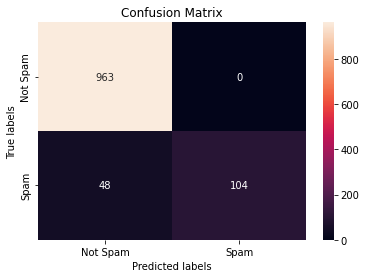

In [13]:
evaluate_model(spam_detectorLR, valid_tfidf, valid['label'])

### Test Data

Accuracy: 96.50224215246637 %
Precision: 99.02912621359224 %
Recall: 72.85714285714285 %
F1 Score: 83.9506172839506 %


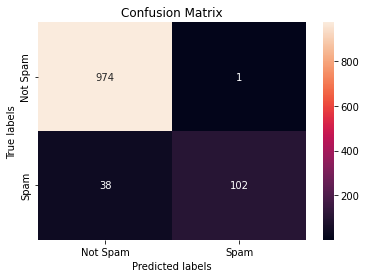

In [14]:
evaluate_model(spam_detectorLR, test_tfidf, test['label'])

## Random Forest Classifier
---
We train a Random Forest Classifier model on the training data and evaluate it on the validation and testing data. We've obtained the Accuracy, precision, recall, F1 score and the confusion matrix in each case.

In [15]:
%time spam_detectorRF = RandomForestClassifier().fit(train_tfidf, train['label'])

CPU times: total: 1.67 s
Wall time: 1.71 s


### Training Data

Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %


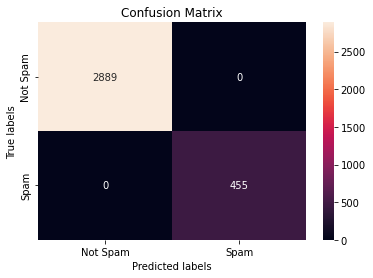

In [16]:
evaluate_model(spam_detectorRF, train_tfidf, train['label'])

### Validation Data

Accuracy: 96.8609865470852 %
Precision: 98.34710743801654 %
Recall: 78.28947368421053 %
F1 Score: 87.17948717948718 %


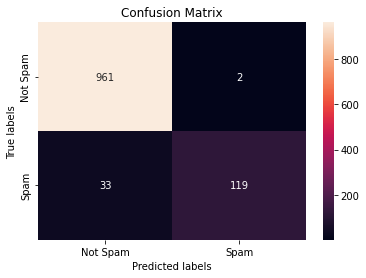

In [17]:
evaluate_model(spam_detectorRF, valid_tfidf, valid['label'])

### Test Data

Accuracy: 96.8609865470852 %
Precision: 98.34710743801654 %
Recall: 78.28947368421053 %
F1 Score: 87.17948717948718 %


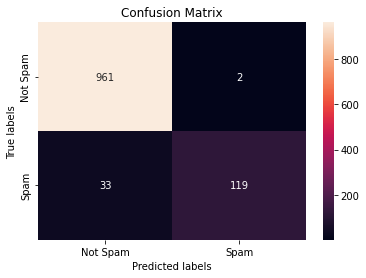

In [18]:
evaluate_model(spam_detectorRF, valid_tfidf, valid['label'])

## The best model
---
Upon observing the scores achieved on the testing data for the three models we can observe that the Random Forest Classifier performs the best.

In [19]:
import pickle, os

if not os.path.exists("../Assignment 3/models"):
    os.mkdir("../Assignment 3/models")

vec_path = "../Assignment 3/models/word_vec.sav"
tfidf_path = "../Assignment 3/models/tfidf.sav"
nb_path = "../Assignment 3/models/nb_model.sav"
lr_path = "../Assignment 3/models/lr_model.sav"
rf_path = "../Assignment 3/models/rf_model.sav"

pickle.dump(word_vec, open(vec_path, "wb"))
pickle.dump(tfidf_transformer, open(tfidf_path, "wb"))
pickle.dump(spam_detectorNB, open(nb_path, "wb"))
pickle.dump(spam_detectorLR, open(lr_path, "wb"))
pickle.dump(spam_detectorRF, open(rf_path, "wb"))